# L'objectif de cet exercice est de réaliser un modèle de machine learning (IA) basé sur la régression logistique capable de prédire si un patient à une maladie cardiaque ou non. Pour cela, nous mettons à votre disposition un jeu de données de 918 patients.

# 1.	Charger le fichier de données Coeur.xlsx dans un objet data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
data = pd.read_excel('Coeur.xlsx')
data.head(10)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
5,39,homme,DNA,120,339,0,Normal,170,Non,0.0,Ascendant,0
6,45,femme,AA,130,237,0,Normal,170,Non,0.0,Ascendant,0
7,54,homme,AA,110,208,0,Normal,142,Non,0.0,Ascendant,0
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
9,48,femme,AA,120,284,0,Normal,120,Non,0.0,Ascendant,0


# 2.	Copiez l’objet data dans un nouvel objet df avec lequel vous allez travailler pour le reste de l’exercice.

In [3]:
df = data.copy()
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


# 3.	Vérifiez s’il y a des doublons dans l’objet df ; si c’est le cas, supprimez-les.

In [4]:
#df.drop_duplicates(keep = 'first', inplace=True) on utilise pour supprimer au cas ou il y a des doublons
df.duplicated().sum()

0

# 4.	Vérifier s’il y a des constantes (variable avec une seule modalité) dans df ; si c’est le cas, supprimez les.

In [5]:
#df.nunique() sil y avait des constantes, on allait utiliser df = df.drop('...', axis=1) pour supprimer ...
df.nunique()

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

# 5.	Vérifier s’il y a des données manquantes dans df ; si c’est le cas, supprimez les.

In [6]:
# df = df.dropna(axis=0) on utilise pour supprimer au cas ou il y a des donnees manquantes
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

# 6.	Faite une normalisation de toutes les variables quantitatives en divisant les valeurs de chaque colonne par la moyenne de celle-ci. Attention, la variable cible (COEUR) n'est pas à normaliser.

In [7]:
# on selectionne tout sauf object puis on enleve coeur
df_quant = df.select_dtypes(exclude='object').drop('CŒUR', axis=1)

In [8]:
df_quant = df.select_dtypes(exclude='object').drop('CŒUR', axis=1).columns
for col in df_quant:
    df[col]=pd.DataFrame(df[col]/df[col].mean())
df_norm = df[df_quant]
df_norm
#     df_quant = pd.DataFrame(df_quant[i]/df_quant[i].mean(), index = df_quant.index, columns = df_quant.columns)

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,0.747511,1.057430,1.453726,0.00000,1.257224,0.000000
1,0.915701,1.208491,0.905435,0.00000,1.140273,1.126933
2,0.691448,0.981899,1.423544,0.00000,0.716325,0.000000
3,0.897014,1.042324,1.076461,0.00000,0.789420,1.690400
4,1.009140,1.132960,0.980887,0.00000,0.891752,0.000000
...,...,...,...,...,...,...
913,0.840950,0.830838,1.327971,0.00000,0.964846,1.352320
914,1.270769,1.087642,0.970827,4.28972,1.030631,3.831574
915,1.065204,0.981899,0.658955,0.00000,0.840586,1.352320
916,1.065204,0.981899,1.187125,0.00000,1.271843,0.000000


#  7.	Faite un recodage de toutes les variables qualitatives.

In [9]:
def recoder(data): 
    return data.astype('category').cat.codes

def recoder_df(data):
    for col in data.select_dtypes('object').columns:
        data[col] = recoder(data[col])
#serie.astype('category').cat.codes

    return data

df = recoder_df(df)
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.747511,1,0,1.057430,1.453726,0.00000,1,1.257224,0,0.000000,0,0
1,0.915701,0,3,1.208491,0.905435,0.00000,1,1.140273,0,1.126933,2,1
2,0.691448,1,0,0.981899,1.423544,0.00000,2,0.716325,0,0.000000,0,0
3,0.897014,0,1,1.042324,1.076461,0.00000,1,0.789420,1,1.690400,2,1
4,1.009140,1,3,1.132960,0.980887,0.00000,1,0.891752,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.840950,1,2,0.830838,1.327971,0.00000,1,0.964846,0,1.352320,2,1
914,1.270769,1,1,1.087642,0.970827,4.28972,1,1.030631,0,3.831574,2,1
915,1.065204,1,1,0.981899,0.658955,0.00000,1,0.840586,1,1.352320,2,1
916,1.065204,0,0,0.981899,1.187125,0.00000,0,1.271843,0,0.000000,2,1


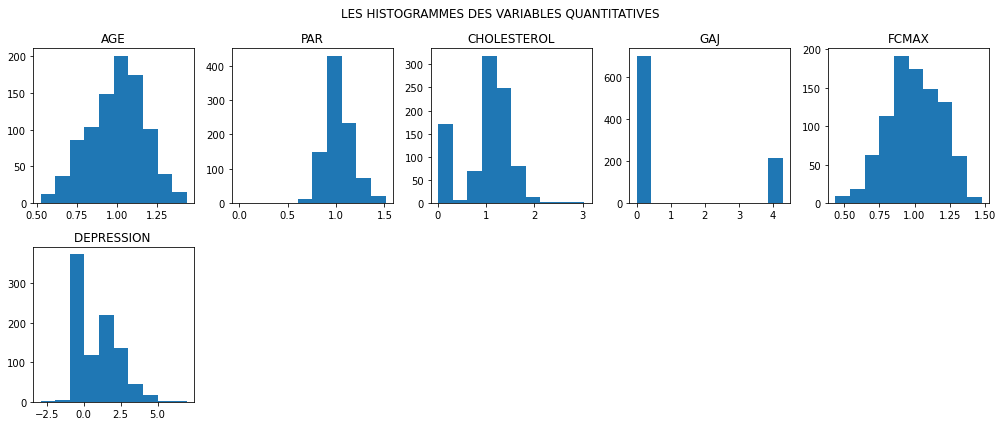

In [24]:
# LES HISTOGRAMMES DES VARIABLES QUANTITATIVES
plt.figure(tight_layout = True, figsize = (14, 6))
plt.suptitle("LES HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(df_quant):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{df_quant[y]}")
plt.show()

In [26]:
# representation graphique des variables qualitatives

def type_variable(df):
    liste_variables = list(df.columns)
    qual = []
    liste_quant = []
    for col in liste_variables:
        if col in list(df.select_dtypes('object')):
            liste_qual.append(col)
        else:
            liste_quant.append(col)
    return liste_qual, liste_quant

# qual, quant = type_variable(df)
# print(qual)
# print(quant)

# qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives

plt.figure(tight_layout = True, figsize = (10))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()

TypeError: from_bounds() argument after * must be an iterable, not int

# 8.	On souhaite séparer la variable cible COEUR des autres variables de votre objet df. Pour cela, stocker la variable COEUR dans un objet appelé Y et les autres variables dans un objet appelé X.

In [10]:
y = df['CŒUR']
X = df.drop('CŒUR', axis=1)
X

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
0,0.747511,1,0,1.057430,1.453726,0.00000,1,1.257224,0,0.000000,0
1,0.915701,0,3,1.208491,0.905435,0.00000,1,1.140273,0,1.126933,2
2,0.691448,1,0,0.981899,1.423544,0.00000,2,0.716325,0,0.000000,0
3,0.897014,0,1,1.042324,1.076461,0.00000,1,0.789420,1,1.690400,2
4,1.009140,1,3,1.132960,0.980887,0.00000,1,0.891752,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.840950,1,2,0.830838,1.327971,0.00000,1,0.964846,0,1.352320,2
914,1.270769,1,1,1.087642,0.970827,4.28972,1,1.030631,0,3.831574,2
915,1.065204,1,1,0.981899,0.658955,0.00000,1,0.840586,1,1.352320,2
916,1.065204,0,0,0.981899,1.187125,0.00000,0,1.271843,0,0.000000,2


# 9.	En utilisant la fonction train_test_split du module model_selection du package sklearn, subdiviser vos données X et Y en respectivement  X_train, X_test et Y_train, Y_test. X_train et Y_train doivent contenir respectivement 80 % des données de X et Y.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#pour diviser le dataset, on aura 20% pour entrainer. random_state = 1 pour controler l'aleatoire

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (734, 11)
Test set: (184, 11)


# 10.	En utilisant la classe LogisticRegression du module linear_model du package sklearn, construisez un modèle de régression logistique en utilisant les données X_train et Y_train et la méthode fit de la classe LogisticRegression.

In [12]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

# 11.	En utilisant les données de X_test et la méthode predict_proba de la classe LogisticRegression affichez la probabilité d'appartenance à chacune des classes de la variable COEUR. 

In [13]:
LogReg.predict_proba(X_test[:10])

array([[0.32777726, 0.67222274],
       [0.17504272, 0.82495728],
       [0.03672641, 0.96327359],
       [0.08969688, 0.91030312],
       [0.23290901, 0.76709099],
       [0.76751536, 0.23248464],
       [0.28136854, 0.71863146],
       [0.54133293, 0.45866707],
       [0.95978293, 0.04021707],
       [0.31614393, 0.68385607]])

# 12.	En utilisant les données de X_test et la méthode predict de la classe LogisticRegression prédisez la classe d'appartenance de chaque individu de X_test. 

In [14]:
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

# 13.	En utilisant les données de X_test et Y_test et les méthodes confusion_matrix, accuracy_score, recall_score, et precision_score, du module metrics du package sklearn, affichez respectivement la matrice de confusion, le taux succès, la sensibilité et la précision du modèle.

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)
print('Matrice de confusion :', confusion_matrix(y_pred, y_test))

Matrice de confusion : [[ 66   8]
 [  8 102]]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)
print('le taux succès :', accuracy_score(y_pred, y_test))

le taux succès : 0.9130434782608695


In [17]:
from sklearn.metrics import recall_score
recall_score(y_pred, y_test)
print('la sensibilite :', recall_score(y_pred, y_test))

la sensibilite : 0.9272727272727272


In [18]:
from sklearn.metrics import precision_score
precision_score(y_pred, y_test)
print('la précision du modèle :', precision_score(y_pred, y_test))

la précision du modèle : 0.9272727272727272


In [19]:
#appliquer la regression logistique sur notre base de donnee
Classifier=LogisticRegression()
Classifier.fit(X_train,y_train)

LogisticRegression()

In [20]:
#Enregistrer mon modele pour le deployer
pickle.dump(Classifier,open('model.pkl','wb'))